## Take Home Assignment 1 – Python Solutions

### 1. Reducing the Number of Intensity Levels in an Image

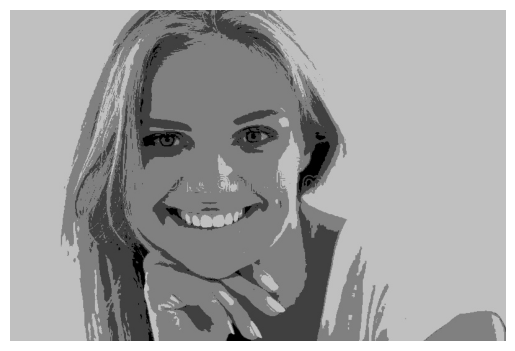

True

In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def reduce_intensity_levels(image_path, num_levels):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    step = 256 // num_levels
    reduced_img = (img // step) * step
    return reduced_img


reduced = reduce_intensity_levels('input.png', 4)
img = cv2.imread('reduced_4_levels.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
cv2.imwrite('reduced_4_levels.jpg', reduced)

### 2. Spatial Averaging with 3x3, 10x10, and 20x20 Neighborhoods

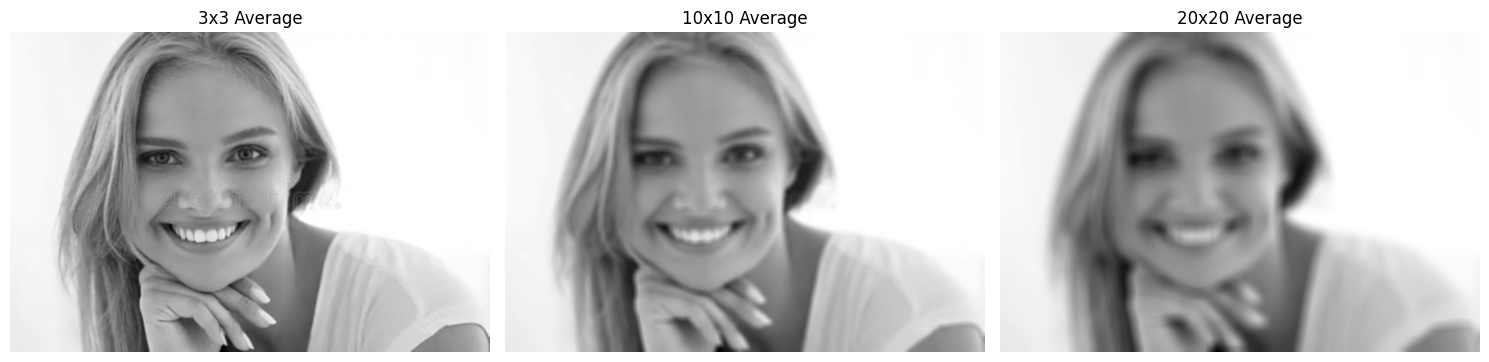

In [8]:
import cv2
import numpy as np

def average_filter(image_path, ksize):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    kernel = np.ones((ksize, ksize), np.float32) / (ksize * ksize)
    avg_img = cv2.filter2D(img, -1, kernel)
    return avg_img

avg3 = average_filter('input.png', 3)
avg10 = average_filter('input.png', 10)
avg20 = average_filter('input.png', 20)
cv2.imwrite('avg_3x3.jpg', avg3)
cv2.imwrite('avg_10x10.jpg', avg10)
cv2.imwrite('avg_20x20.jpg', avg20)

img3 = cv2.imread('avg_3x3.jpg', cv2.IMREAD_GRAYSCALE)
img10 = cv2.imread('avg_10x10.jpg', cv2.IMREAD_GRAYSCALE)
img20 = cv2.imread('avg_20x20.jpg', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img3, cmap='gray')
axes[0].set_title('3x3 Average')
axes[0].axis('off')

axes[1].imshow(img10, cmap='gray')
axes[1].set_title('10x10 Average')
axes[1].axis('off')

axes[2].imshow(img20, cmap='gray')
axes[2].set_title('20x20 Average')
axes[2].axis('off')

plt.tight_layout()
plt.show()



### 3.Rotating an Image by 45 and 90 Degrees

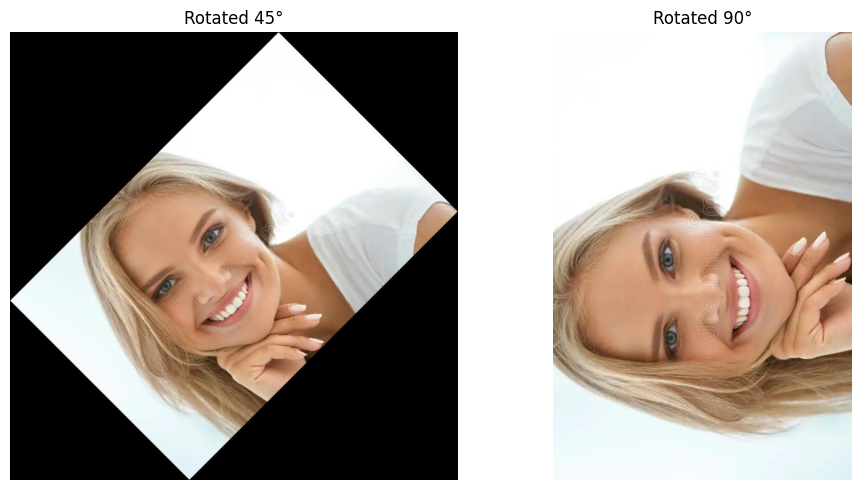

In [10]:
from PIL import Image

def rotate_image(image_path, angle):
    img = Image.open(image_path)
    rotated_img = img.rotate(angle, expand=True)
    return rotated_img

rotated_45 = rotate_image('input.png', 45)
rotated_45.save('rotated_45.jpg')
rotated_90 = rotate_image('input.png', 90)
rotated_90.save('rotated_90.jpg')

img45 = Image.open('rotated_45.jpg')
img90 = Image.open('rotated_90.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img45)
axes[0].set_title('Rotated 45°')
axes[0].axis('off')

axes[1].imshow(img90)
axes[1].set_title('Rotated 90°')
axes[1].axis('off')

plt.tight_layout()
plt.show()


### 4. Block Averaging for Spatial Resolution Reduction

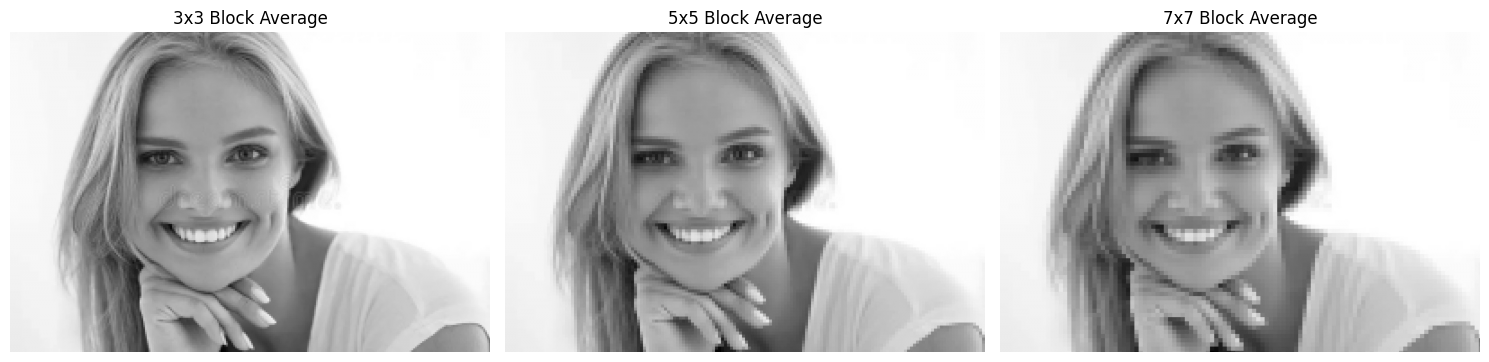

In [11]:
import cv2
import numpy as np

def block_average(image_path, block_size):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    out = img.copy()
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img[i:i+block_size, j:j+block_size]
            avg = np.mean(block, dtype=np.float32)
            out[i:i+block_size, j:j+block_size] = avg
    return out

block3 = block_average('input.png', 3)
block5 = block_average('input.png', 5)
block7 = block_average('input.png', 7)
cv2.imwrite('block_3x3.jpg', block3)
cv2.imwrite('block_5x5.jpg', block5)
cv2.imwrite('block_7x7.jpg', block7)

img3 = cv2.imread('block_3x3.jpg', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('block_5x5.jpg', cv2.IMREAD_GRAYSCALE)
img7 = cv2.imread('block_7x7.jpg', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img3, cmap='gray')
axes[0].set_title('3x3 Block Average')
axes[0].axis('off')

axes[1].imshow(img5, cmap='gray')
axes[1].set_title('5x5 Block Average')
axes[1].axis('off')

axes[2].imshow(img7, cmap='gray')
axes[2].set_title('7x7 Block Average')
axes[2].axis('off')

plt.tight_layout()
plt.show()
